# 3. Model Training 

## 3.1. Movement Data
Starting first with trying to predict User using statistical features of movement data, and testing different time intervels and it's effect on the accuracy of the results

In [140]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight') 
%matplotlib inline

# importing Machine Learning Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB

# importing from sklearn the evaluation metrics for classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# importing from sklearn model selection 
from sklearn.model_selection import StratifiedShuffleSplit

# import tqdm to show a smart progress meter
from tqdm.notebook import trange,tqdm

# import warnings to hide the unnessairy warniings
import warnings
warnings.filterwarnings('ignore')

In [141]:
SEED = 42
df_slow = pd.read_csv('../data/processed/movement_slow_stat_cleaned.csv')
df_fast = pd.read_csv('../data/processed/movement_fast_stat_cleaned.csv')
df_slow['ID'] = df_slow['ID'].apply(lambda x : x.split('/')[4])
df_fast['ID'] = df_fast['ID'].apply(lambda x : x.split('/')[4])

IDs = {'group1_order1_user0': 1, 'group1_order1_user1': 2, 'group1_order1_user10': 3, 'group1_order1_user11': 4, 'group1_order1_user12': 5, 
       'group1_order1_user13': 6, 'group1_order1_user14': 7, 'group1_order1_user2': 8, 'group1_order1_user3': 9, 'group1_order1_user4': 10,
       'group1_order1_user5': 11, 'group1_order1_user6': 12, 'group1_order1_user7': 13, 'group1_order1_user8': 14, 'group1_order1_user9': 15, 
       'group1_order2_user0': 16, 'group1_order2_user1': 17, 'group1_order2_user10': 18, 'group1_order2_user11': 19, 'group1_order2_user12': 20, 
       'group1_order2_user13': 21, 'group1_order2_user14': 22, 'group1_order2_user2': 23, 'group1_order2_user3': 24, 'group1_order2_user4': 25, 
       'group1_order2_user5': 26, 'group1_order2_user6': 27, 'group1_order2_user7': 28, 'group1_order2_user8': 29, 'group1_order2_user9': 30, 
       'group2_order1_user0': 31, 'group2_order1_user1': 32, 'group2_order1_user10': 33, 'group2_order1_user11': 34, 'group2_order1_user12': 35, 
       'group2_order1_user13': 36, 'group2_order1_user14': 37, 'group2_order1_user2': 38, 'group2_order1_user3': 39, 'group2_order1_user4': 40, 
       'group2_order1_user5': 41, 'group2_order1_user6': 42, 'group2_order1_user7': 43, 'group2_order1_user8': 44, 'group2_order1_user9': 45, 
       'group2_order2_user0': 46, 'group2_order2_user1': 47, 'group2_order2_user10': 48, 'group2_order2_user11': 49, 'group2_order2_user12': 50, 
       'group2_order2_user13': 51, 'group2_order2_user14': 52, 'group2_order2_user2': 53, 'group2_order2_user3': 54, 'group2_order2_user4': 55, 
       'group2_order2_user5': 56, 'group2_order2_user6': 57, 'group2_order2_user7': 58, 'group2_order2_user8': 59, 'group2_order2_user9': 60}

df_slow['ID'] = df_slow['ID'].apply(lambda x: IDs[x] - 1 )
df_fast['ID'] = df_fast['ID'].apply(lambda x: IDs[x] - 1 )

df_slow.fillna(0, inplace=True)
df_fast.fillna(0, inplace=True)

In [142]:
X = df_slow.drop(columns=['Unnamed: 0', 'ID'])
y = df_slow['ID']
fast_X = df_fast.drop(columns=['Unnamed: 0', 'ID'])
fast_y = df_fast['ID']
fast_X['TouchButtons_50%'] = 0
fast_X['TouchButtons_min'] = 0
# Unique minutes in the dataset
unique_minutes = df_slow['time_interval'].unique()

# Split data based on selected minutes
X_train = X[X['time_interval'].isin(unique_minutes[:50])]
y_train = y[X['time_interval'].isin(unique_minutes[:50])]

X_test = X[X['time_interval'].isin(unique_minutes[50:59])]
y_test = y[X['time_interval'].isin(unique_minutes[50:59])]

# Drop the 'minute' column from X_train and X_test as it's no longer needed for training/testing
X_train = X_train.drop(columns=['time_interval'])
X_test = X_test.drop(columns=['time_interval'])


print("Size of the training set: ", X_train.shape)
print("Size of the testing set: ", X_test.shape)


Size of the training set:  (2997, 229)
Size of the testing set:  (540, 229)


In [143]:
classifiers = [['SVC',SVC(kernel="rbf", C=0.025, probability=True, random_state=SEED)],
               ['ExtraTreesClassifier', ExtraTreesClassifier(random_state=SEED)],
              ["LinearDiscriminantAnalysis", LinearDiscriminantAnalysis()],
              ['DecisionTreeClassifier',DecisionTreeClassifier(random_state=SEED)],
              ['KNeighborsClassifier', KNeighborsClassifier()],
              ['RandomForestClassifier', RandomForestClassifier(random_state=SEED)],
              ['MLPClassifier',MLPClassifier(random_state=SEED)],
              ['AdaBoostClassifier',AdaBoostClassifier(random_state=SEED)],
              ['GaussianNB', GaussianNB()],
              ['QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis()],
              ['LogisticRegression', LogisticRegression(random_state=SEED)],
              ['XGBClassifier', XGBClassifier(random_state=SEED)],
              ['BernoulliNB', BernoulliNB()]]

In [144]:
from sklearnex import patch_sklearn
patch_sklearn()

def evaluate_classifiers(classifiers):
    models = []
    best_score = 0 
    best_model = None
    cm = None
    Accuracy_set = pd.DataFrame(index=None, columns=['Model','Accuracy(Train)','Accuracy(Test)','Accuracy(Fast)','F1(Train)','F1(Test)', 'Precision(Train)','Precision(Test)', 'Recall(Train)','Recall(Test)', 'Log_loss(Train)','Log_loss(Test)'])
    for i in tqdm(range(len(classifiers))):
        name = classifiers[i][0]
        model = classifiers[i][1]

        model.fit(X_train,y_train)

        y_train_predicted = model.predict(X_train)
        y_test_predicited = model.predict(X_test)

        accuracy_train = accuracy_score(y_train, y_train_predicted)
        accuracy_test = accuracy_score(y_test, y_test_predicited)
        accuracy_fast = accuracy_score(fast_y, model.predict(fast_X[X_train.columns]))


        f1_Score_train = f1_score(y_train, y_train_predicted,average='micro')
        f1_Score_test = f1_score(y_test, y_test_predicited,average='micro')

        precision_score_train = precision_score(y_train, y_train_predicted,average='micro')
        precision_score_test = precision_score(y_test, y_test_predicited,average='micro')

        recall_score_train = recall_score(y_train, y_train_predicted,average='micro')
        recall_score_test = recall_score(y_test, y_test_predicited,average='micro')

        log_loss_train = log_loss(y_train, model.predict_proba(X_train))
        log_loss_test = log_loss(y_test, model.predict_proba(X_test))

        # store the models
        models.append((name,accuracy_test,model))

        if accuracy_test > best_score:
            best_model = model
            best_score = accuracy_test
            cm = confusion_matrix(y_test, y_test_predicited)

        Accuracy_set = Accuracy_set.append(pd.Series({'Model':name, 'Accuracy(Train)':accuracy_train,'Accuracy(Test)':accuracy_test,'Accuracy(Fast)':accuracy_fast , 'F1(Train)':f1_Score_train,'F1(Test)':f1_Score_test,'Precision(Train)':precision_score_train,'Precision(Test)':precision_score_test,'Recall(Train)':recall_score_train,'Recall(Test)':recall_score_test,'Log_loss(Train)':log_loss_train,'Log_loss(Test)':log_loss_test}),ignore_index=True )
    return Accuracy_set, models, best_model,cm

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [145]:
Accuracy_set, models, best_model,cm = evaluate_classifiers(classifiers)
Accuracy_set.sort_values(by='Accuracy(Test)').style.background_gradient(cmap= plt.cm.Blues)

  0%|          | 0/13 [00:00<?, ?it/s]

,Model,Accuracy(Train),Accuracy(Test),Accuracy(Fast),F1(Train),F1(Test),Precision(Train),Precision(Test),Recall(Train),Recall(Test),Log_loss(Train),Log_loss(Test)
0,SVC,0.078745,0.085185,0.026793,0.078745,0.085185,0.078745,0.085185,0.078745,0.085185,3.647678,3.839839
4,KNeighborsClassifier,0.412079,0.090741,0.026514,0.412079,0.090741,0.412079,0.090741,0.412079,0.090741,1.253010,23.432543
6,MLPClassifier,0.134468,0.090741,0.009210,0.134468,0.090741,0.134468,0.090741,0.134468,0.090741,25.030552,28.313833
9,QuadraticDiscriminantAnalysis,1.000000,0.094444,0.034329,1.000000,0.094444,1.000000,0.094444,1.000000,0.094444,0.000000,31.276781
10,LogisticRegression,0.096096,0.103704,0.017862,0.096096,0.103704,0.096096,0.103704,0.096096,0.103704,3.609196,3.921512
7,AdaBoostClassifier,0.183517,0.183333,0.000000,0.183517,0.183333,0.183517,0.183333,0.183517,0.183333,3.672444,3.672604
12,BernoulliNB,0.817150,0.690741,0.013397,0.817150,0.690741,0.817150,0.690741,0.817150,0.690741,2.345952,4.796314
8,GaussianNB,0.828495,0.738889,0.011722,0.828495,0.738889,0.828495,0.738889,0.828495,0.738889,2.660987,5.361774
2,LinearDiscriminantAnalysis,0.865199,0.866667,0.033491,0.865199,0.866667,0.865199,0.866667,0.865199,0.866667,2.972620,2.946262
11,XGBClassifier,1.000000,0.964815,0.051912,1.000000,0.964815,1.000000,0.964815,1.000000,0.964815,0.009410,0.189873


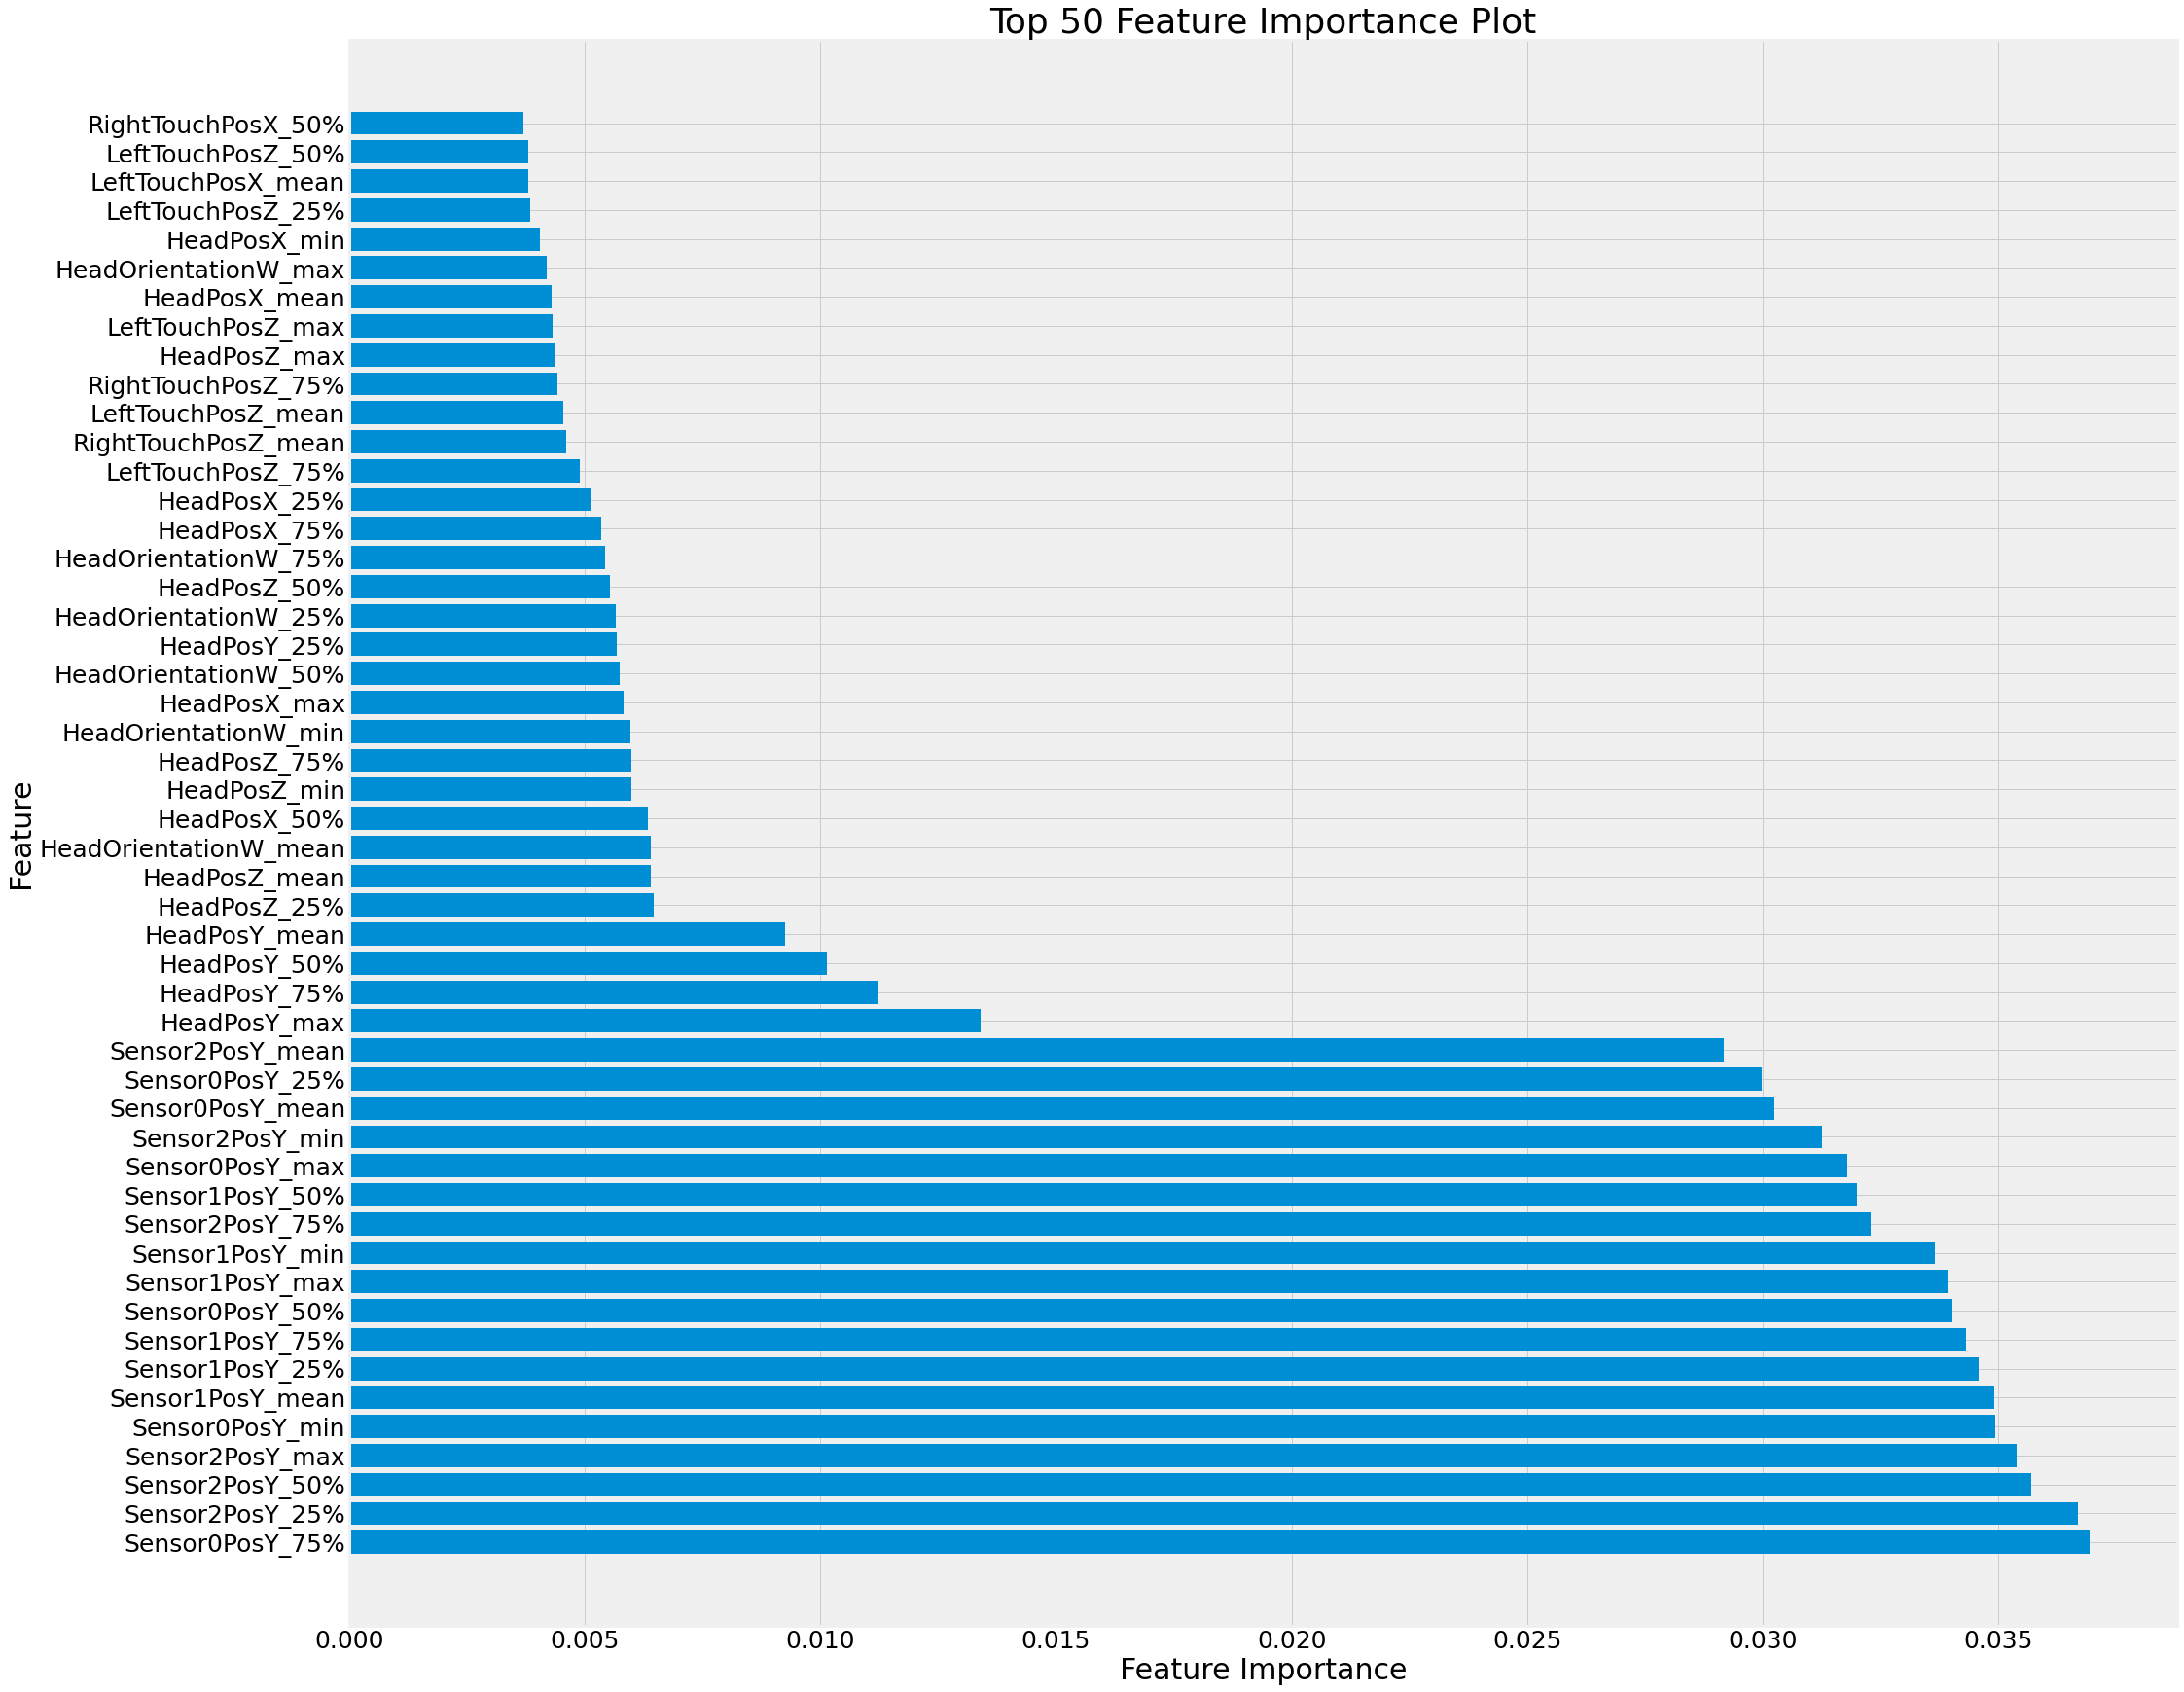

In [146]:
# Plotting feature importance if the best model is a tree-based model
feature_importance = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to store feature importance and names
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Select top 10 features
top_features = importance_df.head(50)

plt.rcParams.update({'font.size': 25})  
plt.figure(figsize=(30,30))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 50 Feature Importance Plot')
plt.show()

Text(0.5, 302.2199999999999, 'Predicted label')

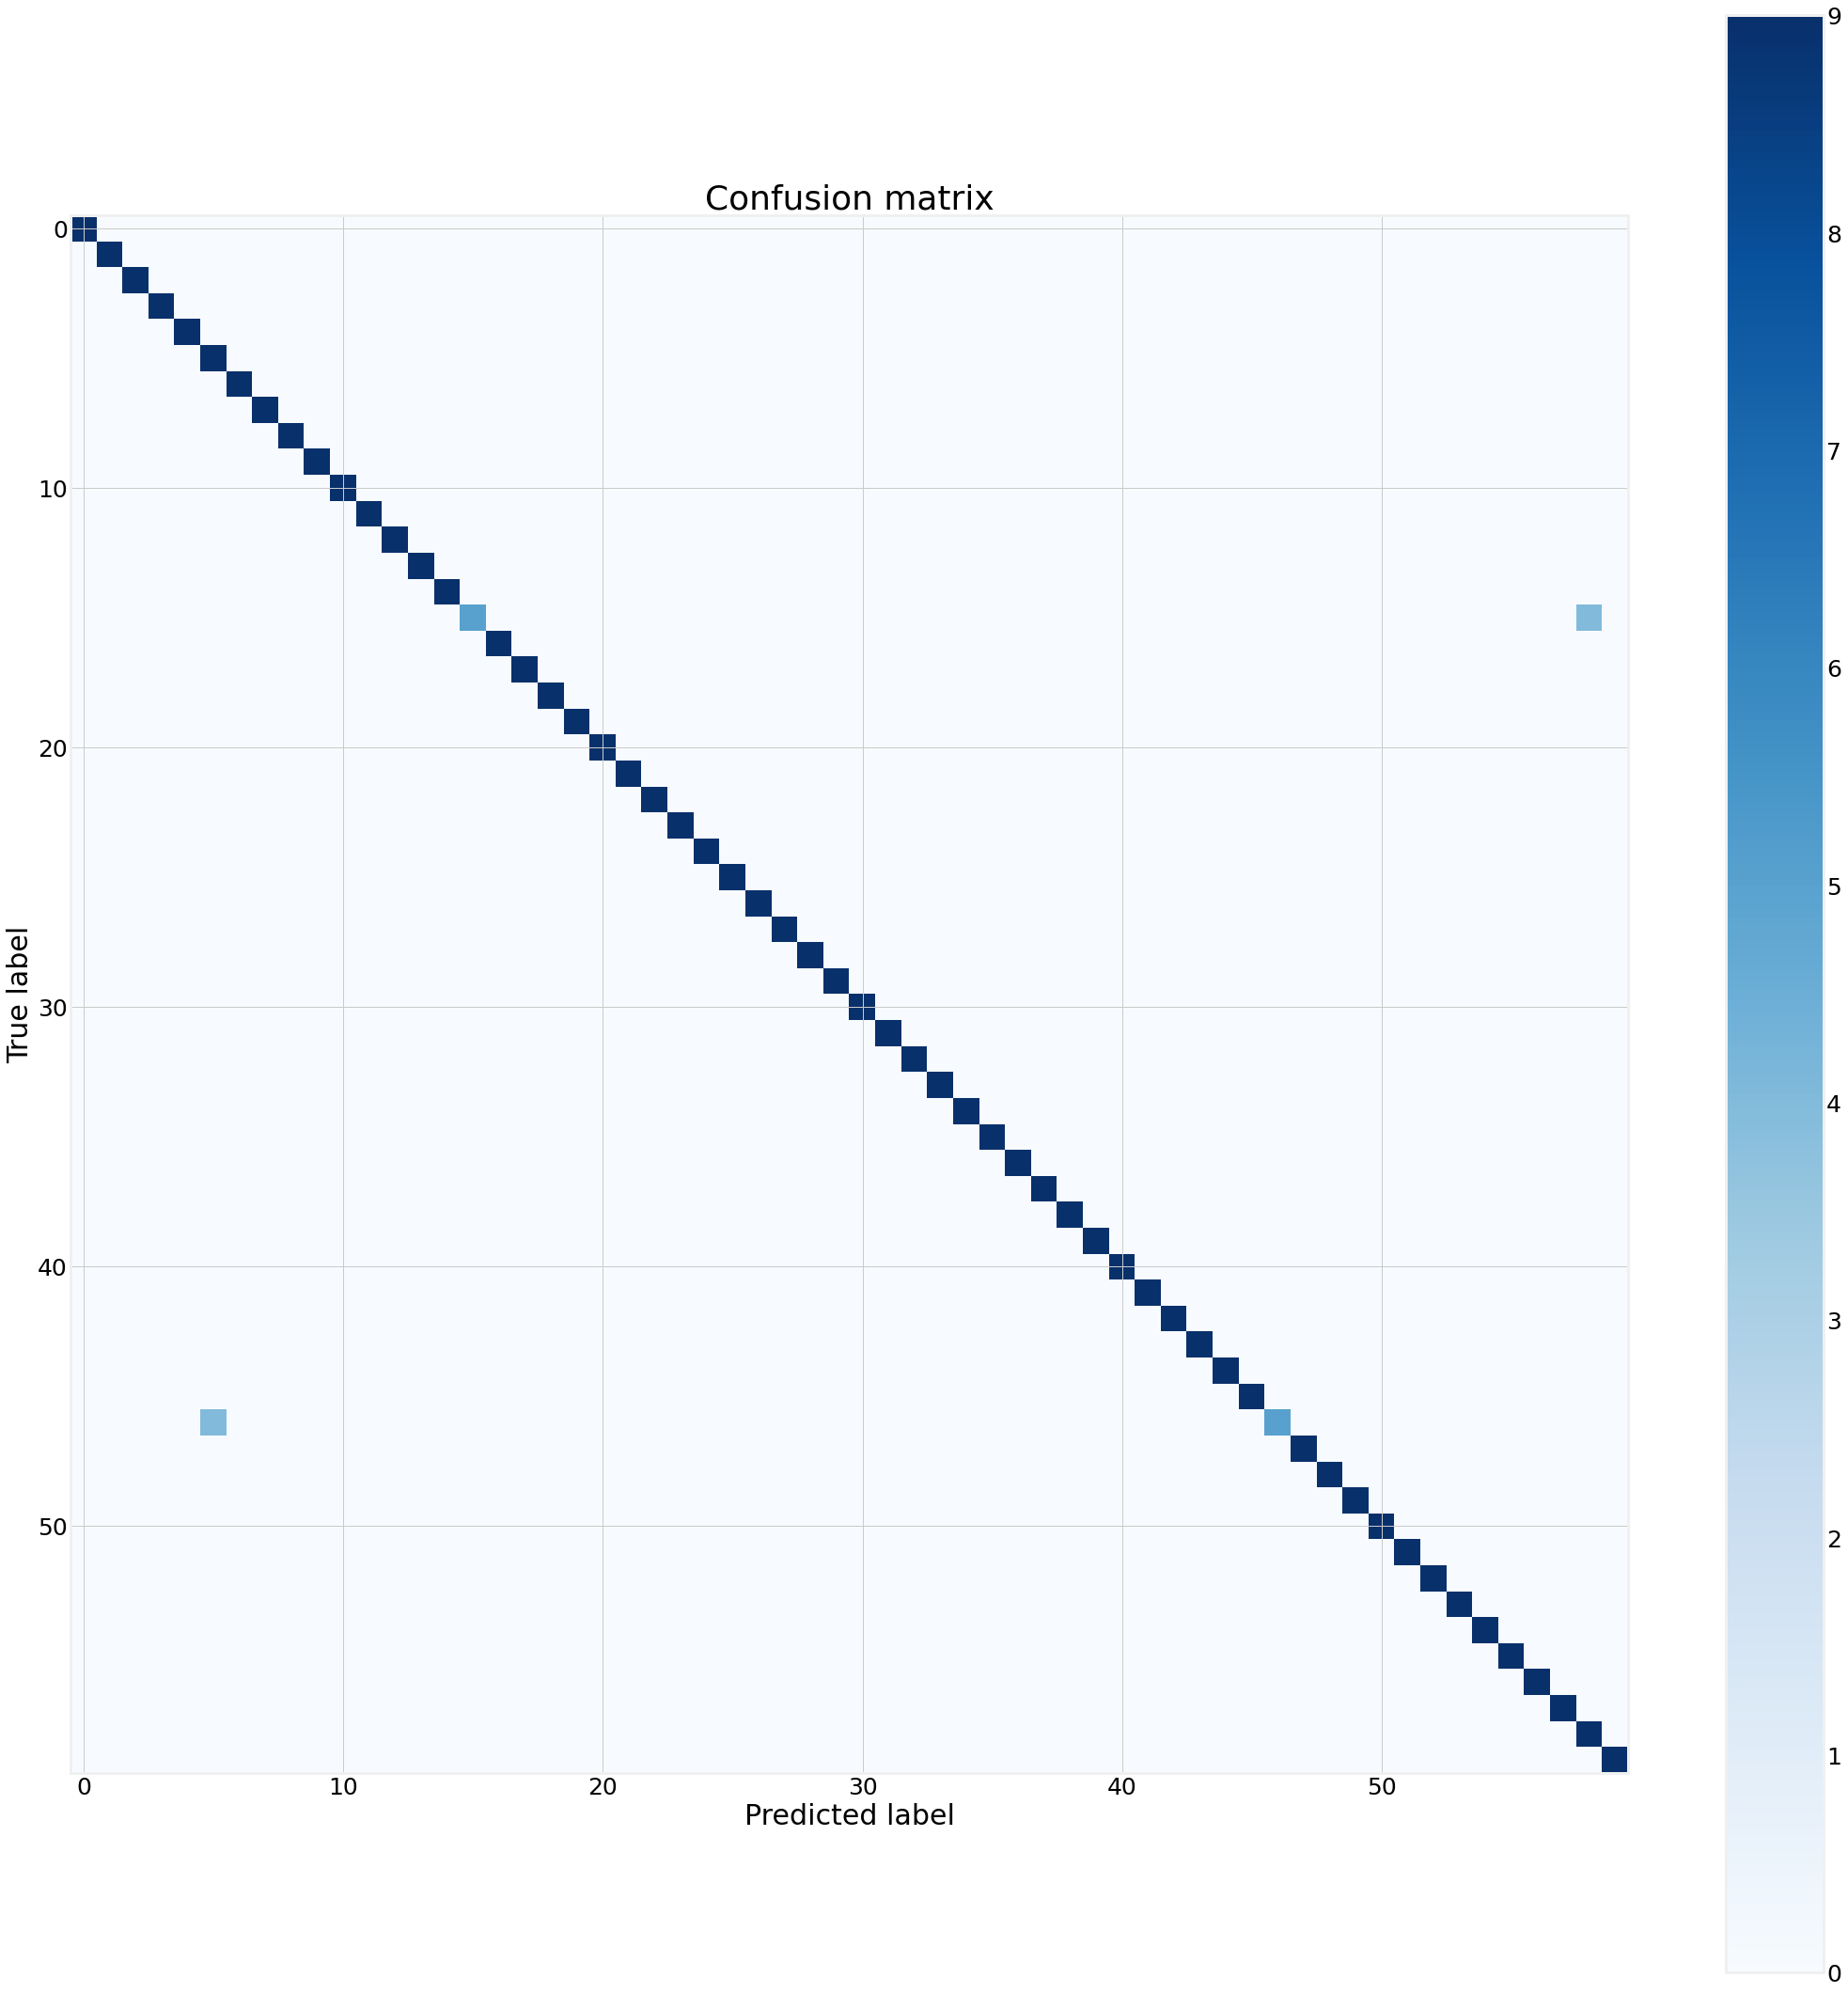

In [147]:
plt.figure(figsize=(30,30))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

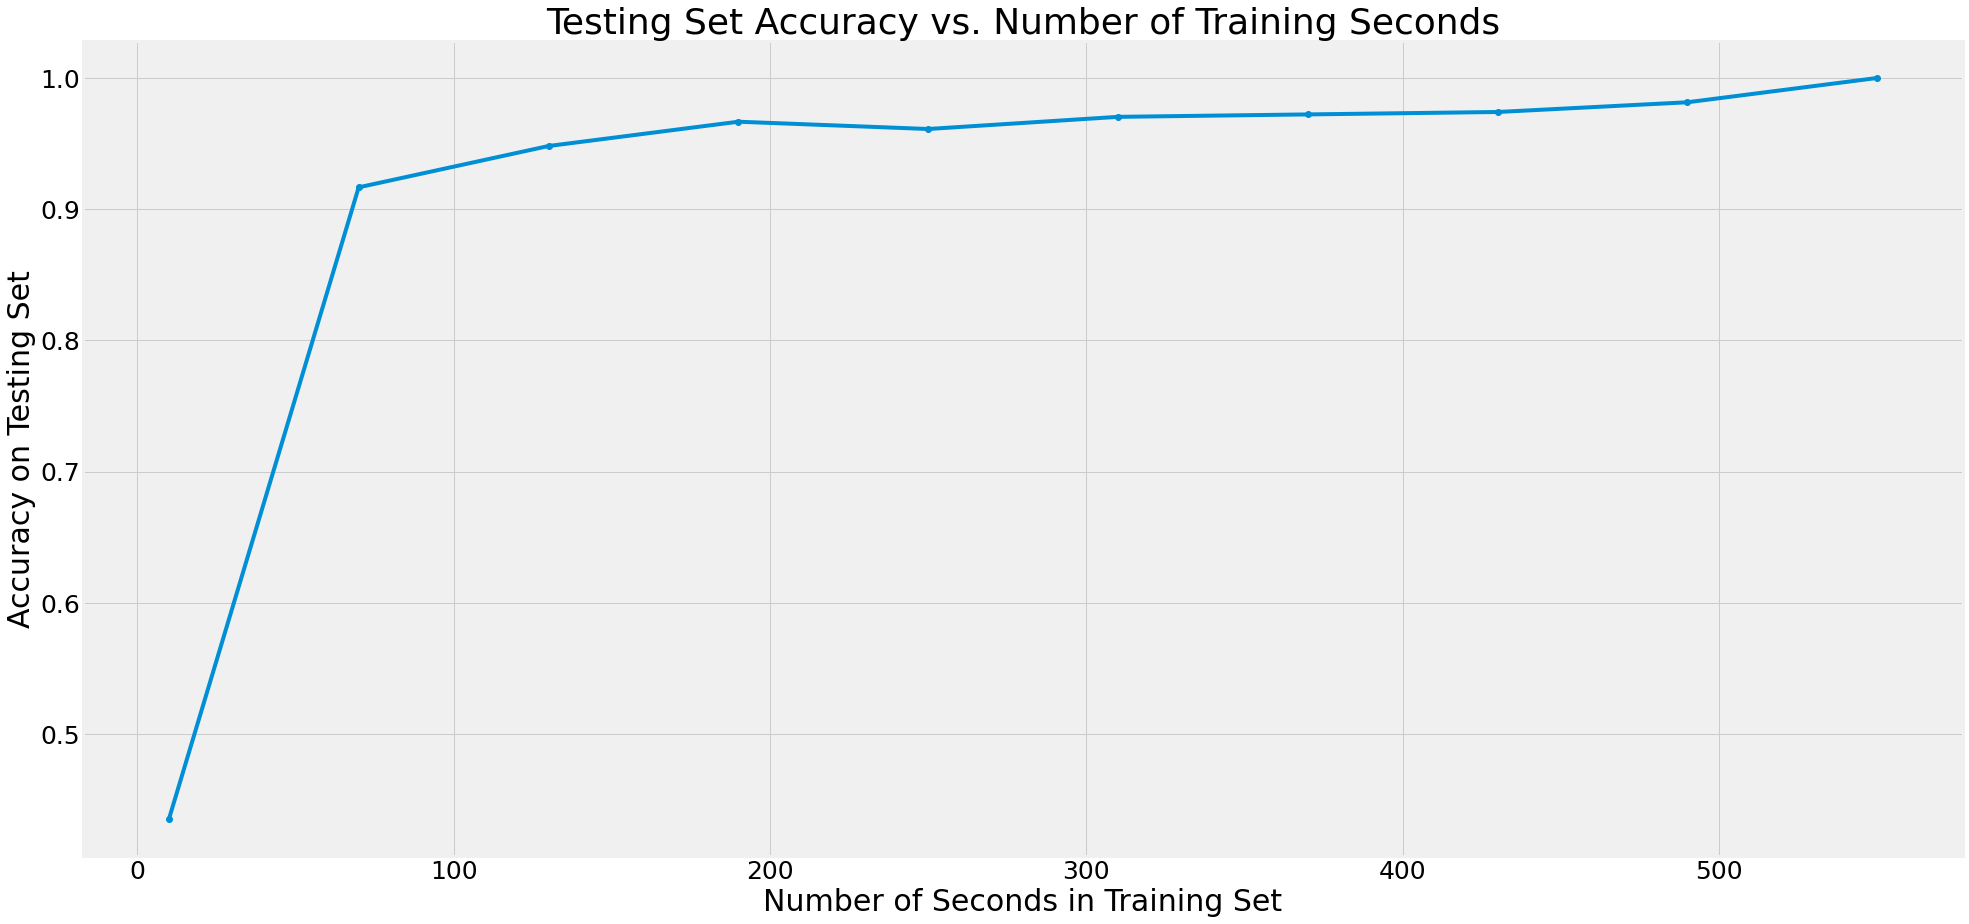

In [148]:
def train_with_increasing_minutes(X, y, unique_minutes, X_test, y_test):
    accuracies = []
    minutes_range = range(1, len(unique_minutes), 6)  # Increment by 5 minutes for each step

    for max_minute in minutes_range:
        selected_minutes = unique_minutes[:max_minute]
        X_train = X[X['time_interval'].isin(selected_minutes)]
        y_train = y[X['time_interval'].isin(selected_minutes)]
        
        # Remove 'time_interval' column for training and testing
        X_train_filtered = X_train.drop(columns=['time_interval'])
        
        model = ExtraTreesClassifier(random_state=42)
        model.fit(X_train_filtered, y_train)
        
        # Test accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)
    
    # Plotting
    plt.figure(figsize=(30, 15))
    plt.plot(np.array(minutes_range)*10, accuracies, marker='o', linestyle='-')
    plt.title('Testing Set Accuracy vs. Number of Training Seconds')
    plt.xlabel('Number of Seconds in Training Set')
    plt.ylabel('Accuracy on Testing Set')
    plt.show()

train_with_increasing_minutes(X, y, unique_minutes, X_test, y_test)

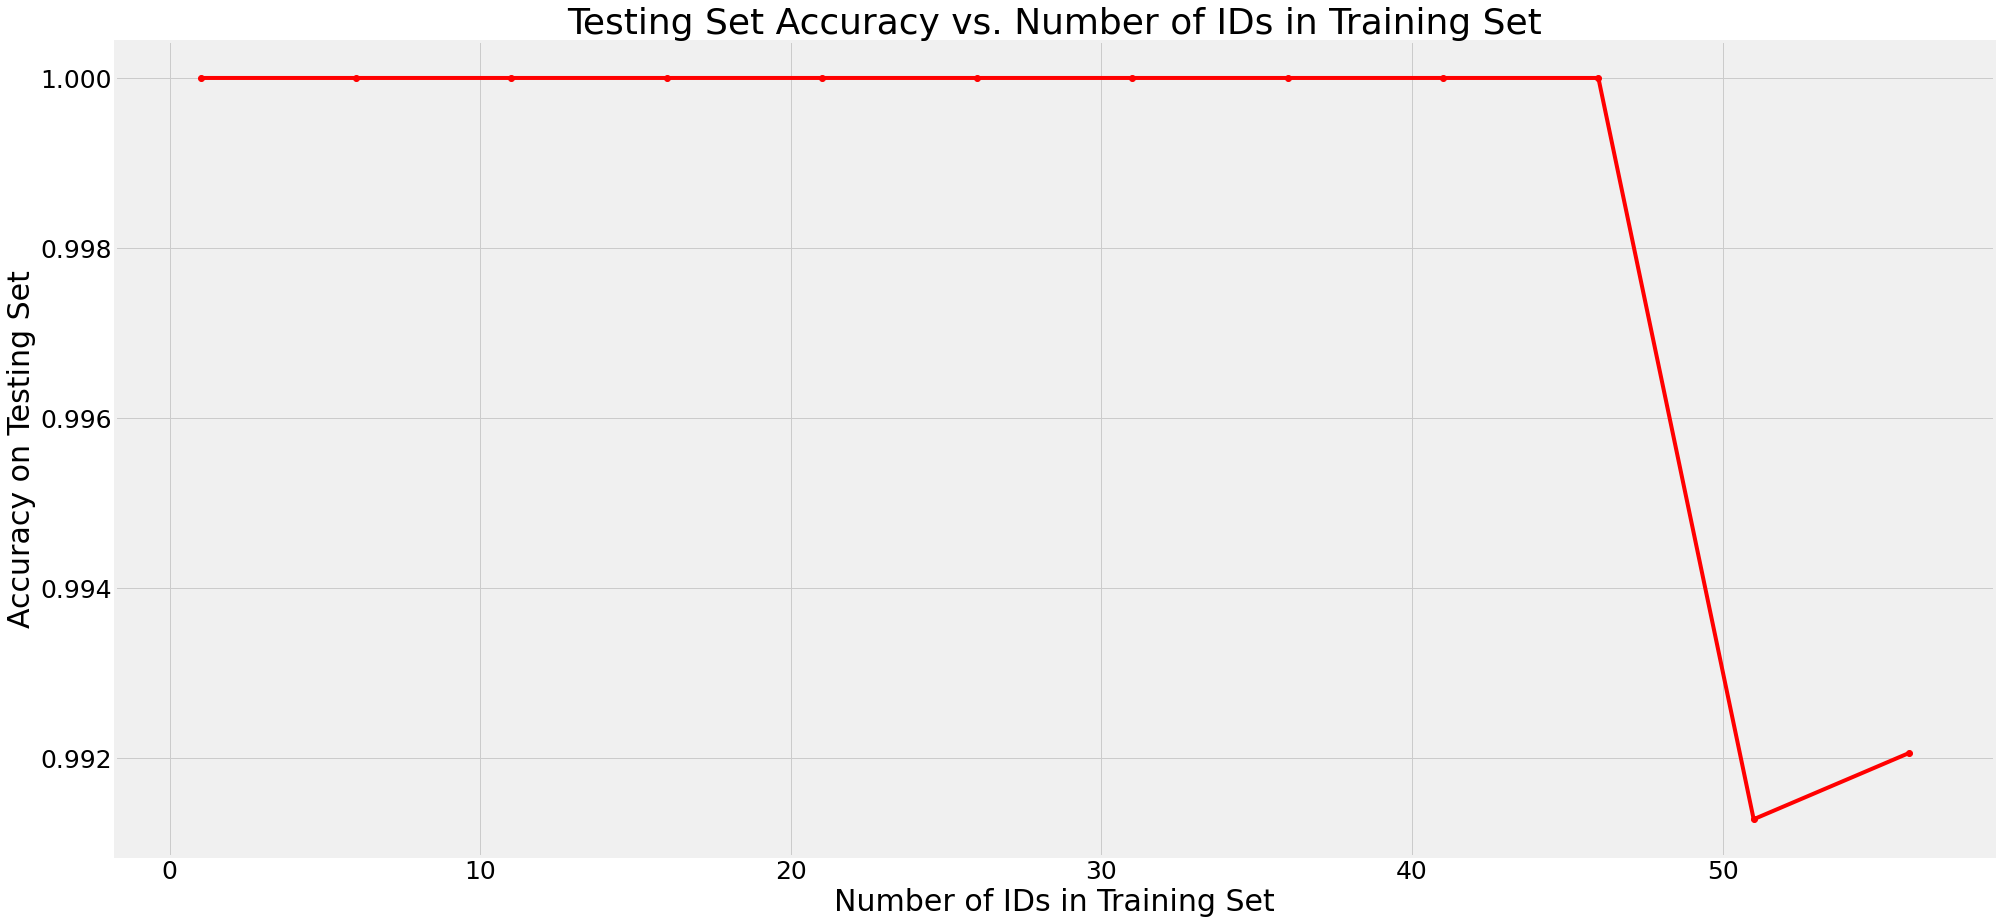

In [152]:
def train_with_increasing_ids(X, y, X_test, y_test):
    unique_ids = np.sort(y.unique())
    accuracies = []
    id_ranges = range(1, len(unique_ids), 5)  
    for num_ids in id_ranges:
        selected_ids = unique_ids[:num_ids]
        model = ExtraTreesClassifier(random_state=42)
        model.fit(X[y.isin(selected_ids)], y[y.isin(selected_ids)])
        
        # Test accuracy
        y_pred = model.predict(X_test[y_test.isin(selected_ids)])
        accuracy = accuracy_score(y_test[y_test.isin(selected_ids)], y_pred)
        accuracies.append(accuracy)
    
    # Plotting
    plt.figure(figsize=(30, 15))
    plt.plot(id_ranges, accuracies, marker='o', linestyle='-', color='r')
    plt.title('Testing Set Accuracy vs. Number of IDs in Training Set')
    plt.xlabel('Number of IDs in Training Set')
    plt.ylabel('Accuracy on Testing Set')
    plt.show()
train_with_increasing_ids(X_train, y_train, X_test, y_test)

Text(0.5, 302.2199999999999, 'Predicted label')

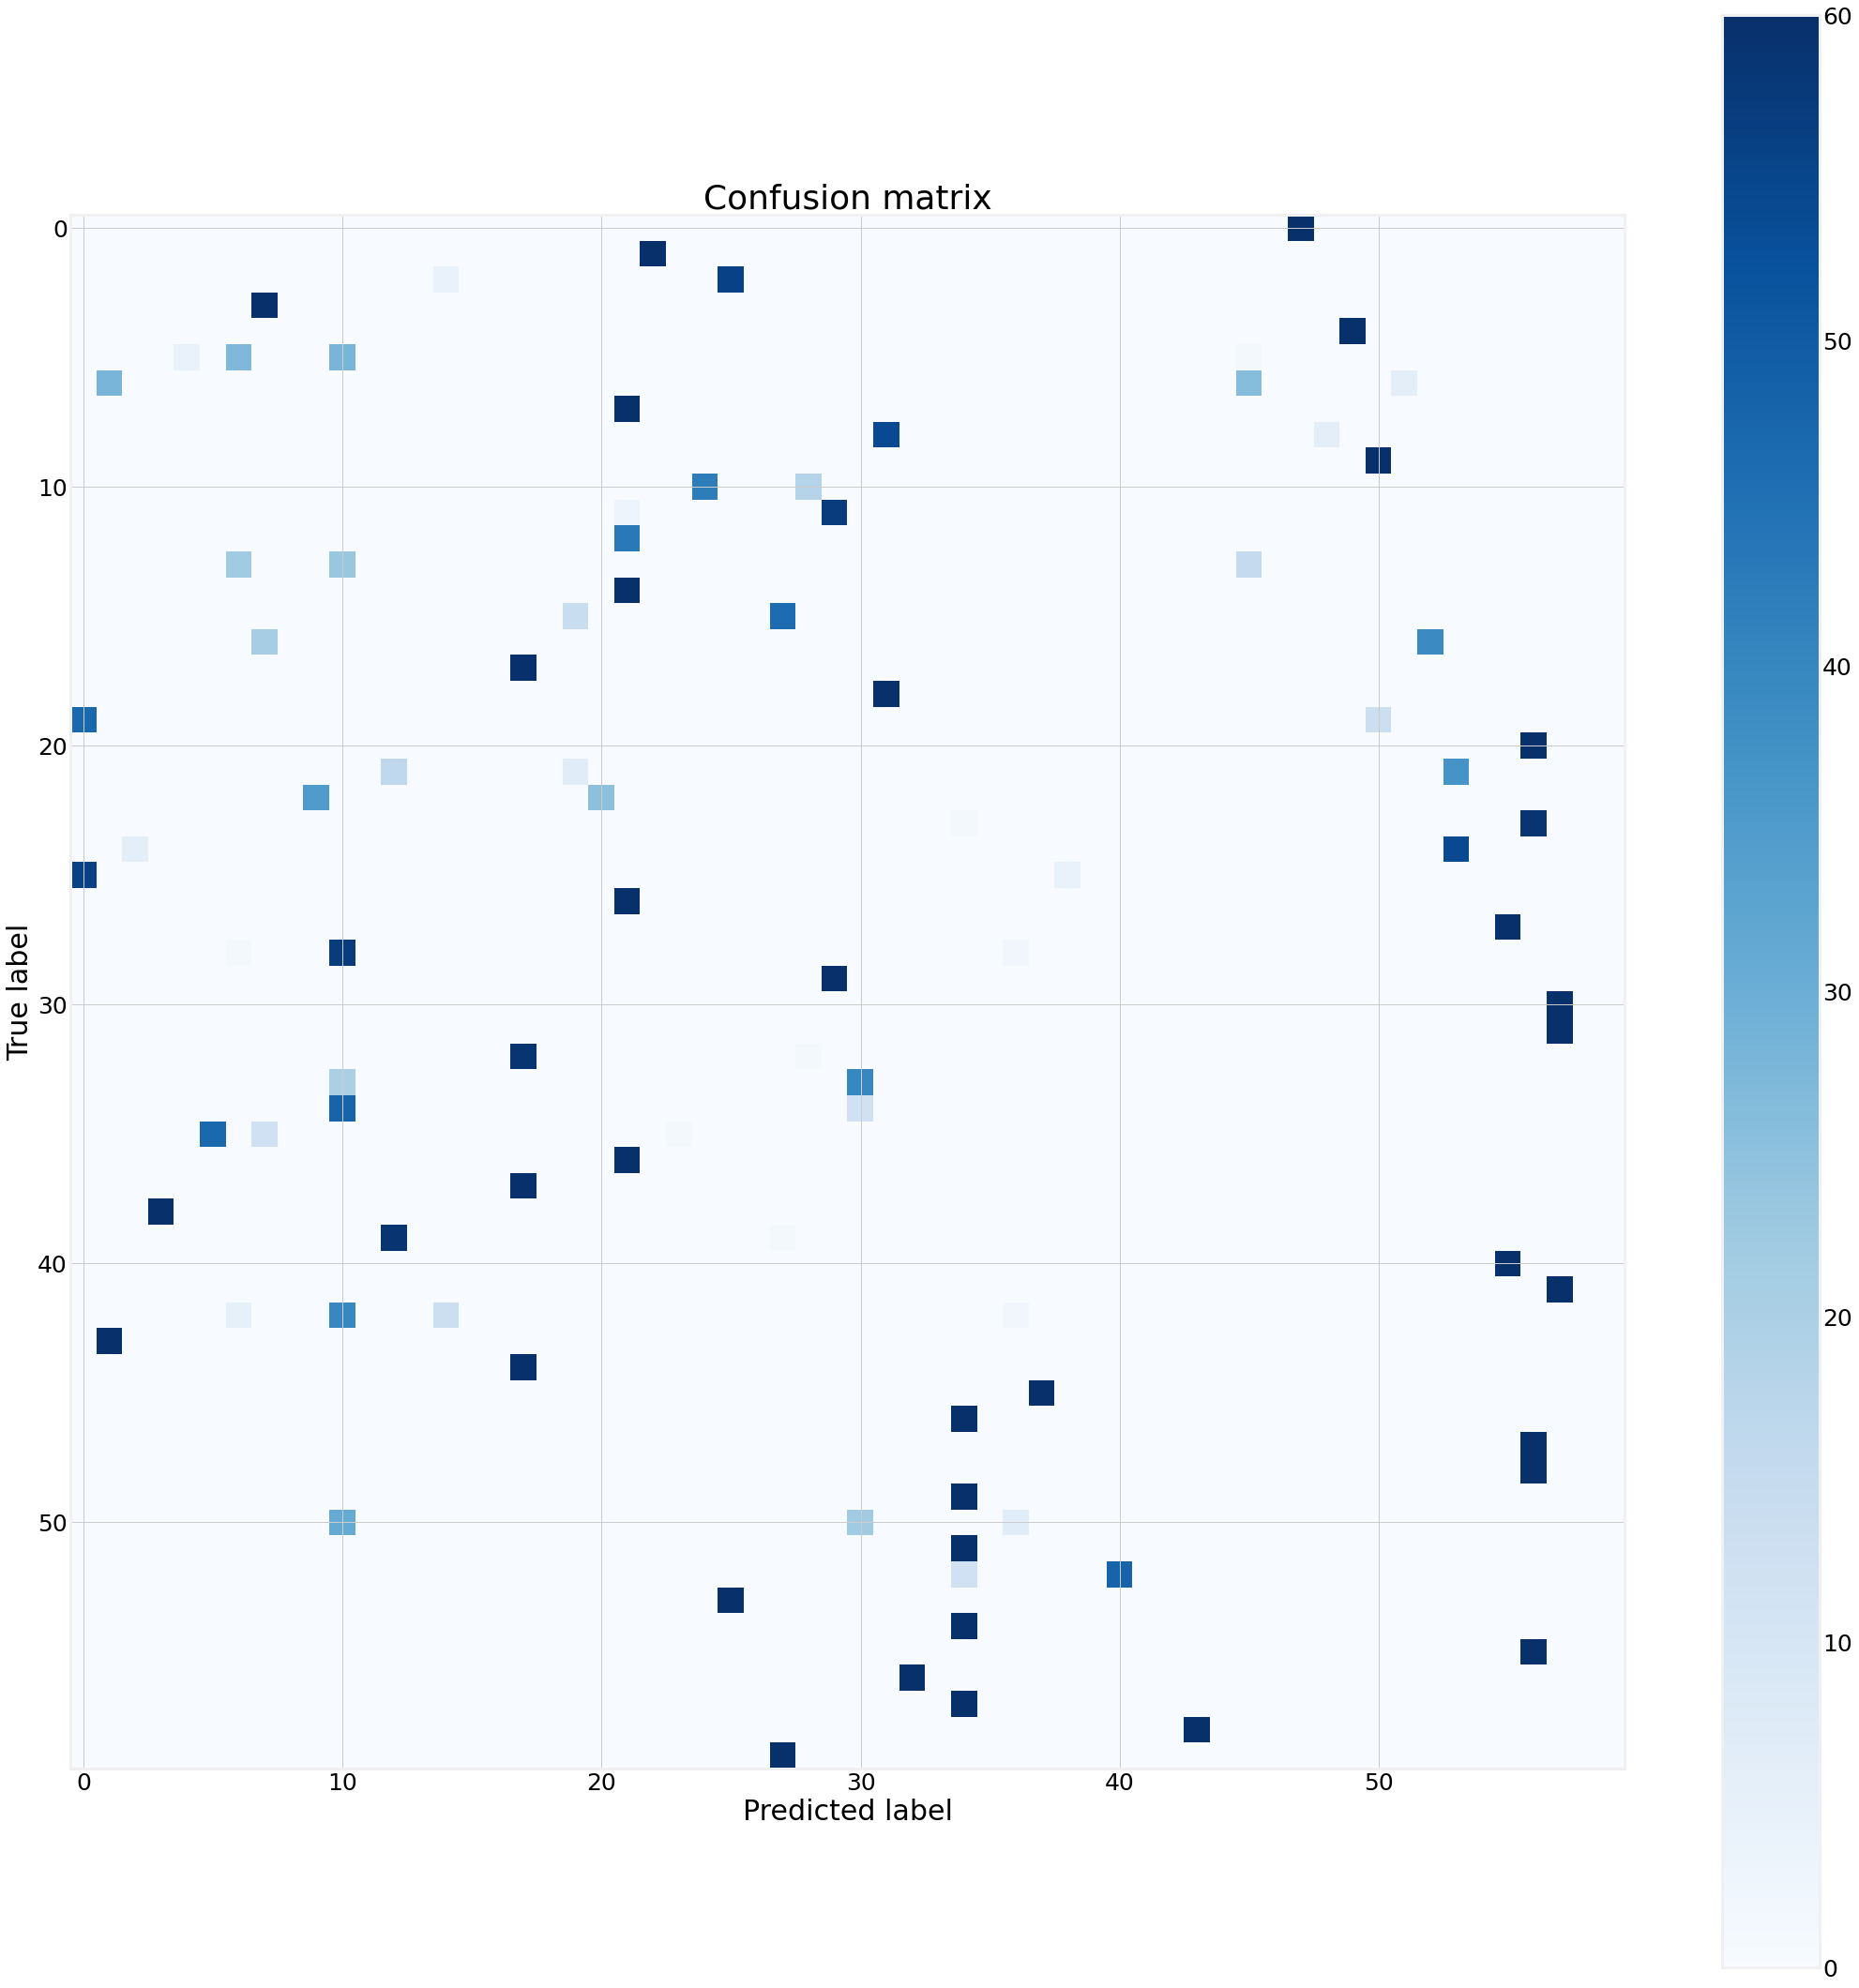

In [150]:
plt.figure(figsize=(30,30))
plt.imshow(confusion_matrix(fast_y, best_model.predict(fast_X[X_train.columns])), interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')